In [4]:
import numpy as np
import sys
import os
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
np.set_printoptions(threshold=sys.maxsize) # show full ndarray

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Inference

## Static: reason for the bent down beam

**Likelihood**

<AxesSubplot:xlabel='Distance', ylabel='Height'>

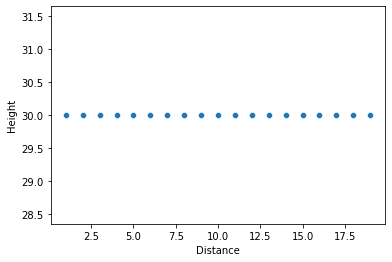

In [222]:
# Physical Beam
beam_samples = np.array(list(range(1, 20, 1)))
phy_height = np.array([30] * 19)
phy_beam = np.append(phy_height[:, None], beam_samples[:, None], axis=1)
column_values = ['Height', 'Distance']
phy_beam_df = pd.DataFrame(data = phy_beam, columns = column_values)
sns.scatterplot(data = phy_beam_df, x="Distance", y="Height")

**Prior**

In [185]:
distance = prior_median_dist_df['Radial Distance']
height = prior_median_dist_df['TransformedHeight']

prior_dict = defaultdict(list)
for i in range(len(distance)):
    print(distance[i], height[i])
    if (not math.isnan(distance[i])):
        prior_dict[round(distance[i])].append(height[i])

nan -256.0
nan -255.0
nan -254.0
nan -253.0
nan -252.0
nan -251.0
nan -250.0
nan -249.0
nan -248.0
nan -247.0
nan -246.0
nan -245.0
nan -244.0
nan -243.0
nan -242.0
nan -241.0
nan -240.0
nan -239.0
nan -238.0
nan -237.0
nan -236.0
nan -235.0
nan -234.0
nan -233.0
nan -232.0
nan -231.0
nan -230.0
nan -229.0
nan -228.0
nan -227.0
nan -226.0
nan -225.0
nan -224.0
nan -223.0
nan -222.0
nan -221.0
nan -220.0
nan -219.0
nan -218.0
nan -217.0
nan -216.0
nan -215.0
nan -214.0
nan -213.0
nan -212.0
nan -211.0
nan -210.0
nan -209.0
nan -208.0
nan -207.0
nan -206.0
nan -205.0
nan -204.0
nan -203.0
nan -202.0
nan -201.0
nan -200.0
nan -199.0
nan -198.0
nan -197.0
nan -196.0
nan -195.0
nan -194.0
nan -193.0
nan -192.0
nan -191.0
nan -190.0
nan -189.0
nan -188.0
nan -187.0
nan -186.0
nan -185.0
nan -184.0
nan -183.0
nan -182.0
nan -181.0
nan -180.0
nan -179.0
nan -178.0
nan -177.0
nan -176.0
nan -175.0
nan -174.0
nan -173.0
nan -172.0
nan -171.0
nan -170.0
nan -169.0
nan -168.0
nan -167.0
nan -166.0

In [190]:
prior = list()
for phy_distance in beam_samples:
    if (phy_distance in list(prior_dict.keys())) and (max(prior_dict[phy_distance]) >= 0):
        prior.append(max(prior_dict[phy_distance]))
    else:
        prior.append(math.nan)
prior

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 255.0,
 78.0,
 57.0,
 39.0,
 29.0,
 17.0,
 11.0,
 6.0,
 3.0,
 nan]

In [209]:
prior_beam = np.append(np.array(prior)[:, None], beam_samples[:, None], axis=1)
column_values = ['Height', 'Distance']
prior_beam_df = pd.DataFrame(data = prior_beam, columns = column_values)

**Posterior**

In [211]:
def combined_mean (dm, dt, vm, vt):
    return (1/vm*dm +1/vt*dt) / (1/vm + 1/vt)

In [220]:
per_height = []
for i in range(len(beam_samples)):
    if not math.isnan(prior[i]): 
        per_height.append(combined_mean(prior[i], height[i], 1.4, 1.4))
    else:
        per_height.append(height[i])

In [178]:
prior_median_dist_df['TransformedHeight']

0     -256.0
1     -255.0
2     -254.0
3     -253.0
4     -252.0
       ...  
507    251.0
508    252.0
509    253.0
510    254.0
511    255.0
Name: TransformedHeight, Length: 512, dtype: float64

<AxesSubplot:xlabel='Distance', ylabel='Height'>

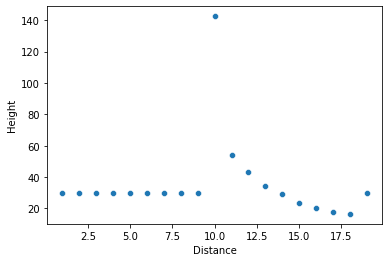

In [221]:
per_beam = np.append(np.array(per_height)[:, None], beam_samples[:, None], axis=1)
column_values = ['Height', 'Distance']
per_beam_df = pd.DataFrame(data = per_beam, columns = column_values)
sns.scatterplot(data = per_beam_df, x="Distance", y="Height")

In [ ]:
 in height

issue:
- 1. rouding issue.
- 2. prior only reaches 19m.